# Introduction to Computer Vision

In this session, we will discuss:

- How to find edges in an image?
- What is a gradient?
- How to write a function in python

In [1]:
# import packages needed
from IPython.display import HTML
import matplotlib.image as mpimg
import numpy as np
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

## Detect Objects in an Image

Often, there are multiple objects in an image.  You might want to find a pedestrian or a car within a street image.  What are some of the approaches used to find objects within in image?

What objects are in the following image?  How did you distinguish the different objects?  Do you do it by color, by position, by shape, by other methods or by a combination of all of the above? 

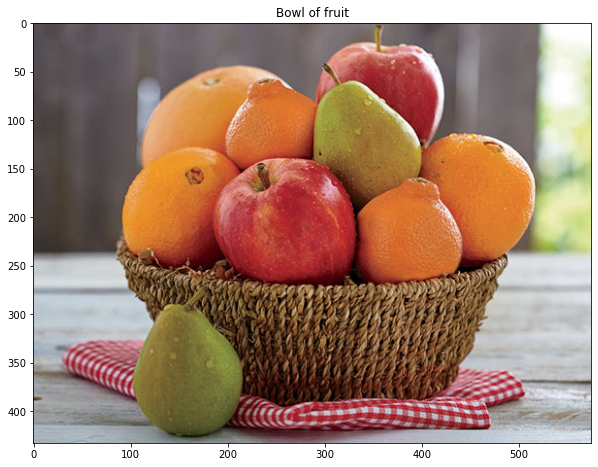

In [2]:
fruit_img = mpimg.imread('navels-grapefruit-pears-apples.jpg')
plt.rcParams["figure.figsize"] = [10, 8]
plt.imshow(fruit_img)
plt.title('Bowl of fruit')
plt.show()

## What types of fruit are in the basket?

Here are some oranges, apples and pears.  Did you notice there are two different types of oranges? 

There are the larger Navel oranges and two Tangelos (or Honeybells which primarily are defined by their bell shapes).  Shapes are an important way we find objects.

How do we distinguish the orange from the basket?  How do we define what is the boundary of the basket and the boundary of the orange?

## Gradient Analysis

Enter Gradient Analysis.  This is one of the ways we can find the separation between differnt objects is to look at the gradient of the image as it changes from one pixel to the next.

Gradient is another word for "slope".  In computer vision, this is the direction of change.  Since images are either 2-D arrays in gray scale images or 3-D arrays in color images, this means this is the rate of change in the integer values that represent gray scale (0-255) or Red/Green/Blue (0-255).

Read more here: https://en.wikipedia.org/wiki/Gradient

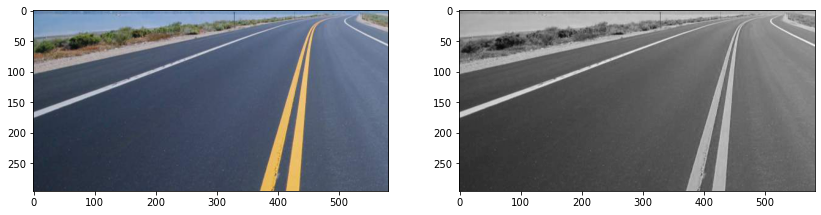

In [3]:
# read in an image
road_img = mpimg.imread('highway_lanes.jpg')
plt.rcParams["figure.figsize"] = [14, 8]
plt.subplot(1, 2, 1)
plt.imshow(road_img)

### Grayscale
gray_road_img = cv2.cvtColor(road_img, cv2.COLOR_BGR2GRAY)
plt.subplot(1, 2, 2)
plt.imshow(gray_road_img, cmap='gray')

plt.show()

In [4]:
print ("Dimension of the gray road image is ", gray_road_img.ndim)
print ("Image size of the gray road image is %i rows x %i columns" % 
                   (gray_road_img.shape[0], gray_road_img.shape[1]))

Dimension of the gray road image is  2
Image size of the gray road image is 296 rows x 582 columns


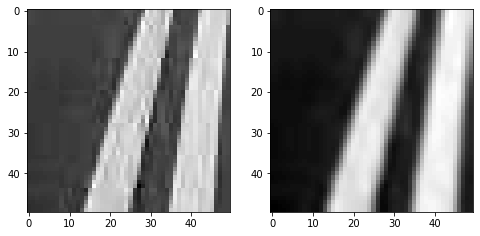

In [5]:
# Take a small slice of this image
small_gray_road_img = gray_road_img[100:150, 400:450]

# Let's blur the image to remove noise
small_blur = cv2.GaussianBlur(small_gray_road_img, (5,5), 0)

plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
plt.imshow(small_gray_road_img, cmap='gray')

plt.subplot(1, 2, 2)
plt.imshow(small_blur, cmap='gray')
plt.show()

Let's examine the values for the first row of the gray and blurred image.

In [6]:
# Original gray image
small_gray_road_img[0:1,:]

array([[103, 102, 101, 100,  99,  99, 100, 100, 101, 101, 101, 101, 101,
        101, 101, 101, 103, 102, 101,  99,  99, 100, 102, 105, 110, 108,
        105, 101, 116, 191, 170, 180, 169, 157, 174, 180,  98,  99, 103,
        103, 102, 104, 149, 183, 189, 178, 176, 176, 178, 161]],
      dtype=uint8)

In [7]:
# Gray Blurred image
small_blur[0:1,:]

array([[102, 102, 101, 100,  99,  99, 100, 100, 101, 101, 101, 101, 101,
        101, 101, 101, 102, 101, 101, 100, 100, 101, 102, 104, 106, 105,
        106, 117, 141, 165, 175, 174, 170, 168, 166, 149, 121, 104, 102,
        103, 107, 124, 151, 174, 182, 180, 177, 176, 173, 171]],
      dtype=uint8)

We can apply a very simple algorithm to find the differences from the 1st to the 2nd value, then from 2nd to the 3d value, etc.

In [8]:
(nrow, ncol) = small_blur.shape

In [9]:
for i in range(ncol):
    print(small_blur[0, i])

102
102
101
100
99
99
100
100
101
101
101
101
101
101
101
101
102
101
101
100
100
101
102
104
106
105
106
117
141
165
175
174
170
168
166
149
121
104
102
103
107
124
151
174
182
180
177
176
173
171


In [10]:
# Remember that pixels are normally saved in uint8 datatype, which is 0 to 255. 
# So if you try to add two of them and it goes over 255, it will fail.
# https://stackoverflow.com/questions/9384435/runtimewarning-overflow-encountered-in-ubyte-scalars

for i in range(ncol):
    if i == 0:
        print("i: %i ,  value = %i"%(i, small_blur[0, i]))
    else:
        # This will result in strange values if you did not cast it to integer
        value = small_blur[0,i]
        prev  = small_blur[0,i-1]
        diff = value - prev
        
        print("i: %i ,  value = %i,  prev = %i,  diff = %i"%(i, value, prev, diff))

i: 0 ,  value = 102
i: 1 ,  value = 102,  prev = 102,  diff = 0
i: 2 ,  value = 101,  prev = 102,  diff = 255
i: 3 ,  value = 100,  prev = 101,  diff = 255
i: 4 ,  value = 99,  prev = 100,  diff = 255
i: 5 ,  value = 99,  prev = 99,  diff = 0
i: 6 ,  value = 100,  prev = 99,  diff = 1
i: 7 ,  value = 100,  prev = 100,  diff = 0
i: 8 ,  value = 101,  prev = 100,  diff = 1
i: 9 ,  value = 101,  prev = 101,  diff = 0
i: 10 ,  value = 101,  prev = 101,  diff = 0
i: 11 ,  value = 101,  prev = 101,  diff = 0
i: 12 ,  value = 101,  prev = 101,  diff = 0
i: 13 ,  value = 101,  prev = 101,  diff = 0
i: 14 ,  value = 101,  prev = 101,  diff = 0
i: 15 ,  value = 101,  prev = 101,  diff = 0
i: 16 ,  value = 102,  prev = 101,  diff = 1
i: 17 ,  value = 101,  prev = 102,  diff = 255
i: 18 ,  value = 101,  prev = 101,  diff = 0
i: 19 ,  value = 100,  prev = 101,  diff = 255
i: 20 ,  value = 100,  prev = 100,  diff = 0
i: 21 ,  value = 101,  prev = 100,  diff = 1
i: 22 ,  value = 102,  prev = 101,  di

/Users/annief/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in ubyte_scalars
  if sys.path[0] == '':


In [11]:
for i in range(ncol):
    if i == 0:
        print("i: %i ,  value = %i"%(i, small_blur[0, i]))
    else:
        # Convert uint8 to integer
        value = int(small_blur[0,i])
        prev  = int(small_blur[0,i-1])
        diff = value - prev       
        print("i: %i ,  value = %i,  prev = %i,  diff = %i "%(i, value, prev, diff))

i: 0 ,  value = 102
i: 1 ,  value = 102,  prev = 102,  diff = 0 
i: 2 ,  value = 101,  prev = 102,  diff = -1 
i: 3 ,  value = 100,  prev = 101,  diff = -1 
i: 4 ,  value = 99,  prev = 100,  diff = -1 
i: 5 ,  value = 99,  prev = 99,  diff = 0 
i: 6 ,  value = 100,  prev = 99,  diff = 1 
i: 7 ,  value = 100,  prev = 100,  diff = 0 
i: 8 ,  value = 101,  prev = 100,  diff = 1 
i: 9 ,  value = 101,  prev = 101,  diff = 0 
i: 10 ,  value = 101,  prev = 101,  diff = 0 
i: 11 ,  value = 101,  prev = 101,  diff = 0 
i: 12 ,  value = 101,  prev = 101,  diff = 0 
i: 13 ,  value = 101,  prev = 101,  diff = 0 
i: 14 ,  value = 101,  prev = 101,  diff = 0 
i: 15 ,  value = 101,  prev = 101,  diff = 0 
i: 16 ,  value = 102,  prev = 101,  diff = 1 
i: 17 ,  value = 101,  prev = 102,  diff = -1 
i: 18 ,  value = 101,  prev = 101,  diff = 0 
i: 19 ,  value = 100,  prev = 101,  diff = -1 
i: 20 ,  value = 100,  prev = 100,  diff = 0 
i: 21 ,  value = 101,  prev = 100,  diff = 1 
i: 22 ,  value = 102, 

In [12]:
# Since we can't have negative values, we'll apply an absolute function to the differences.

# save the differences in a list
blur_diff = []

for i in range(ncol):
    if i == 0:
        blur_diff.append(0)
        print("i: %i ,  value = %i"%(i, small_blur[0, i]))
    else:
        value = int(small_blur[0,i])
        prev  = int(small_blur[0,i-1])
        diff = abs(value - prev)
        blur_diff.append(diff)
        print("i: %i ,  value = %i,  prev = %i,  diff = %i "%(i, value, prev, diff))

i: 0 ,  value = 102
i: 1 ,  value = 102,  prev = 102,  diff = 0 
i: 2 ,  value = 101,  prev = 102,  diff = 1 
i: 3 ,  value = 100,  prev = 101,  diff = 1 
i: 4 ,  value = 99,  prev = 100,  diff = 1 
i: 5 ,  value = 99,  prev = 99,  diff = 0 
i: 6 ,  value = 100,  prev = 99,  diff = 1 
i: 7 ,  value = 100,  prev = 100,  diff = 0 
i: 8 ,  value = 101,  prev = 100,  diff = 1 
i: 9 ,  value = 101,  prev = 101,  diff = 0 
i: 10 ,  value = 101,  prev = 101,  diff = 0 
i: 11 ,  value = 101,  prev = 101,  diff = 0 
i: 12 ,  value = 101,  prev = 101,  diff = 0 
i: 13 ,  value = 101,  prev = 101,  diff = 0 
i: 14 ,  value = 101,  prev = 101,  diff = 0 
i: 15 ,  value = 101,  prev = 101,  diff = 0 
i: 16 ,  value = 102,  prev = 101,  diff = 1 
i: 17 ,  value = 101,  prev = 102,  diff = 1 
i: 18 ,  value = 101,  prev = 101,  diff = 0 
i: 19 ,  value = 100,  prev = 101,  diff = 1 
i: 20 ,  value = 100,  prev = 100,  diff = 0 
i: 21 ,  value = 101,  prev = 100,  diff = 1 
i: 22 ,  value = 102,  prev

In [13]:
# If you plotted this blur_diff, you will hardly see the differences because
# the difference in values between the white lines and the black pavement is 
# not large.  We'll need to amplify the values so it can be rendered as an image.

blur_diff

[0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 2,
 2,
 1,
 1,
 11,
 24,
 24,
 10,
 1,
 4,
 2,
 2,
 17,
 28,
 17,
 2,
 1,
 4,
 17,
 27,
 23,
 8,
 2,
 3,
 1,
 3,
 2]

In [14]:
# Let's say if the difference is less than 10 then the gradient is too small to plot
# If the gradient is 10 or larger then it's worthwhile to plot so amplify it to 255
amplify_blur_diff = []

for i in range(len(blur_diff)):
    if blur_diff[i] < 10:
        amplify_blur_diff.append(0)
    else:
        amplify_blur_diff.append(255)

In [15]:
amplify_blur_diff

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 255,
 255,
 255,
 255,
 0,
 0,
 0,
 0,
 255,
 255,
 255,
 0,
 0,
 0,
 255,
 255,
 255,
 0,
 0,
 0,
 0,
 0,
 0]

In [16]:
for row_i in range(nrow):
    
    # Print the first 3 rows as an example
    if row_i < 3:   
        print("row_i: %i"%(row_i))
        
    for col_j in range(ncol):
        if col_j == 0:
            # Print the first 3 rows as an example
            if row_i < 3:
                print("          col_j: %i ,  value = %i"%(col_j, small_blur[row_i, col_j]))
        else:
            value = int(small_blur[row_i, col_j])
            prev  = int(small_blur[row_i, col_j-1])
            diff = abs(value - prev)
            
            # Print the first 3 rows as an example
            if row_i < 3:
                print("          col_j: %i ,  value = %i,  prev = %i,  diff = %i "%(col_j, value, prev, diff))

row_i: 0
          col_j: 0 ,  value = 102
          col_j: 1 ,  value = 102,  prev = 102,  diff = 0 
          col_j: 2 ,  value = 101,  prev = 102,  diff = 1 
          col_j: 3 ,  value = 100,  prev = 101,  diff = 1 
          col_j: 4 ,  value = 99,  prev = 100,  diff = 1 
          col_j: 5 ,  value = 99,  prev = 99,  diff = 0 
          col_j: 6 ,  value = 100,  prev = 99,  diff = 1 
          col_j: 7 ,  value = 100,  prev = 100,  diff = 0 
          col_j: 8 ,  value = 101,  prev = 100,  diff = 1 
          col_j: 9 ,  value = 101,  prev = 101,  diff = 0 
          col_j: 10 ,  value = 101,  prev = 101,  diff = 0 
          col_j: 11 ,  value = 101,  prev = 101,  diff = 0 
          col_j: 12 ,  value = 101,  prev = 101,  diff = 0 
          col_j: 13 ,  value = 101,  prev = 101,  diff = 0 
          col_j: 14 ,  value = 101,  prev = 101,  diff = 0 
          col_j: 15 ,  value = 101,  prev = 101,  diff = 0 
          col_j: 16 ,  value = 102,  prev = 101,  diff = 1 
          

## Putting it all together

Write some functions to put it gradient function and the amplifcation of differences together.

Resources on writing functions in python.
- https://www.w3schools.com/python/python_functions.asp
- https://www.learnpython.org/en/Functions
- https://realpython.com/defining-your-own-python-function/

### A word about writing functions in Python

Quickly tabulate lines of code:

- Select the lines of code using your mouse
- Hit the [tab] button to tab to the right
- Hit the [shift]+[tab] to tab to the left

Quickly comment lines of code:

- Select the lines of code using your mouse  
- Mac:     [Apple-icon]+[/] to toggle comment/uncomment 
- Windows: [Windows-icon]+[/] to toogle comment/uncomment

In Python, the text within the triple double-quotes (""") is the function's Docstring. The Docstring is the function's help documentation.  In the Jupyter Notebook or any Python-aware IDE, this displays the inline help doc.

- When calling a function, put your cursor on the function name and enter [shift]+[tab] to show the Docstring

In [17]:
def helloWorld(name):
# """
#  This is the inline help section for the function
# """
# print ("1: Hello World, %s"% (name))
#     print ("2: Hello World ", name, "!")   
    return None

# Try to print a local variable from helloWorld() function
#print("name: ", name)

In [18]:
# Try to print a local variable from helloWorld() function
#print("name: ", name)

helloWorld("Woodie")
print(helloWorld.__doc__)

None


In [19]:
# amplify_diff will decide how to amplify the values
# if the absolute value is too small then the difference is essentially 0
# else the difference is amplified to 255 (max pixel value)

def amplify_diff(int_value):
    """
    This amplifies a value to 255 if it is greater than 10.
    Otherwise, it will return 0
    """
    if abs(int_value) < 10:
        return 0
    else:
        return 255

In [20]:
# Boolean Flag when set to True will print out debug statements
IMAGE_DEBUG = False

def image_gradient(image):
    """
    This function will return the gradient of a gray-scale image.
    The differences of pixel values will be amplified by amplify_diff().
    """
    (n_row, n_col) = image.shape
    
    # Save the changes into a list
    diff_list = []
    
    for row_i in range(n_row):
        if IMAGE_DEBUG == True:
            print("row_i: %i"%(row_i))
            
        for col_j in range(n_col):
            if col_j == 0:
                diff_list.append(0)
                if IMAGE_DEBUG == True:
                    print("          col_j: %i ,  value = %i"%(col_j, small_blur[row_i, col_j]))
            else:
                value = int(image[row_i, col_j])
                prev  = int(image[row_i, col_j-1])
                
                diff  = amplify_diff(value - prev)
                diff_list.append(diff)
                if IMAGE_DEBUG == True:
                    print("          col_j: %i ,  value = %i,  prev = %i,  diff = %i "%(col_j, value, prev, diff))
    
    # Convert the list back into an array of the same shape as the input image
    diff_array = np.reshape(diff_list, (n_row, n_col))
    
    return diff_array

In [21]:
## Hover over the image_gradient() function and hit "Shift-tab" 
# to see the "docstring" of the function

gradient_image = image_gradient(small_blur)

In [22]:
gradient_image

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 255,   0,   0],
       [  0,   0,   0, ..., 255,   0,   0],
       [  0,   0,   0, ..., 255,   0,   0]])

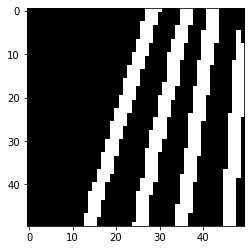

In [23]:
plt.figure(figsize=(8,4))
plt.imshow(gradient_image, cmap='gray')
plt.show()

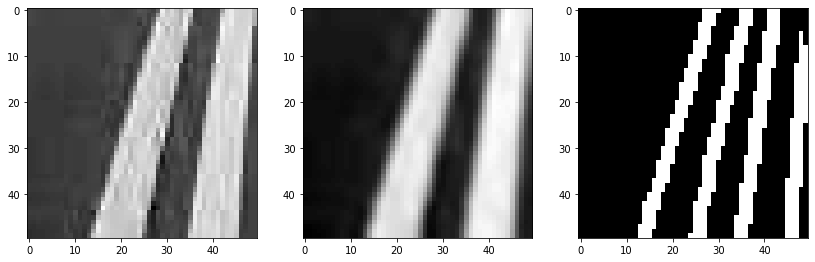

In [24]:
plt.figure(figsize=(14,10))
plt.subplot(1, 3, 1)
plt.imshow(small_gray_road_img, cmap='gray')

plt.subplot(1, 3, 2)
plt.imshow(small_blur, cmap='gray')

plt.subplot(1, 3, 3)
plt.imshow(gradient_image, cmap='gray')

plt.show()

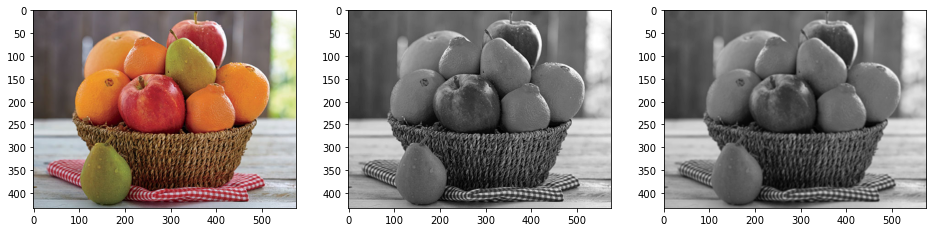

In [25]:
### Grayscale
gray_fruit_img = cv2.cvtColor(fruit_img, cv2.COLOR_BGR2GRAY)
gray_blur_fruit_img = cv2.GaussianBlur(gray_fruit_img, (5,5), 0)

plt.figure(figsize=(16,10))

plt.subplot(1, 3, 1)
plt.imshow(fruit_img, cmap='gray')

plt.subplot(1, 3, 2)
plt.imshow(gray_fruit_img, cmap='gray')

plt.subplot(1, 3, 3)
plt.imshow(gray_blur_fruit_img, cmap='gray')
plt.show()

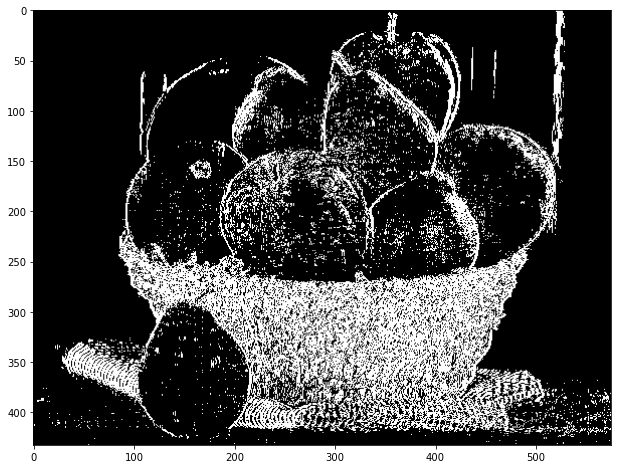

In [26]:
# The plain grayscale image is very noisy because we did not apply a blur filter.
fruit_edges_img = image_gradient(gray_fruit_img)

plt.imshow(fruit_edges_img, cmap='gray')
plt.show()

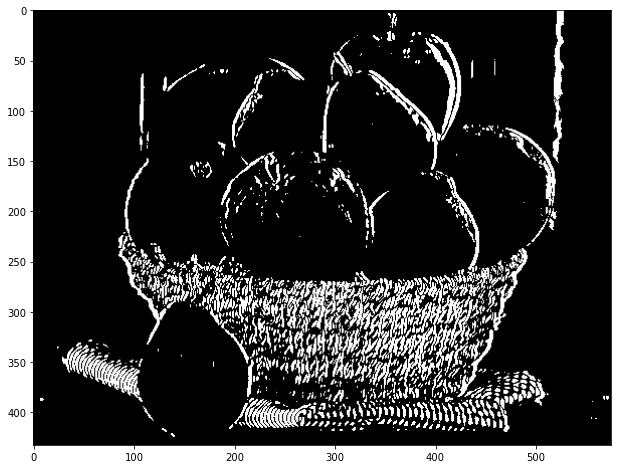

In [27]:
# After applying a blur filter, the edge (gradient detection) is much less noisy
fruit_edges_img = image_gradient(gray_blur_fruit_img)

plt.imshow(fruit_edges_img, cmap='gray')
plt.show()

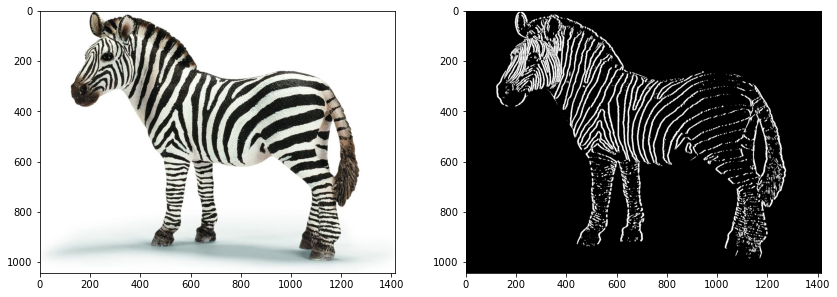

In [28]:
### Zebra: gray scale and blur it
zebra_img = mpimg.imread('zebra.jpg')

plt.rcParams["figure.figsize"] = [14, 8]
plt.subplot(1, 2, 1)
plt.imshow(zebra_img)

### Zebra: gray scale and blur it
zebra_gray_img = cv2.cvtColor(zebra_img, cv2.COLOR_BGR2GRAY)
zebra_gray_blur_img = cv2.GaussianBlur(zebra_gray_img, (9,9), 0)
zebra_gradient_x_img = image_gradient(zebra_gray_blur_img)

plt.subplot(1, 2, 2)
plt.imshow(zebra_gradient_x_img, cmap='gray')
plt.show()

__Whew, that's a lot of work to detect edges!__  There are actually two directions where you can detect edges.  What we just did was in the x-direction because we processed each row at a time (from left to right).  I'll leave it as an exercise for you to write a function to detect edges in the y-direction.  That means you process each column at a time and detect difference in values from top to bottom.

### __Exercise 1: Write your own image gradient function in the y-direction__

Write your own image gradient function in the y-direction and apply it to the zebra and fruit basket pictures.

How is the resulting gradient picture when the gradients are calculated in the y-direction different from the one calculated in the x-direction?

In [29]:
# Exercise 1 - Starter Code

def image_gradient_in_y(image):
    (n_row, n_col) = image.shape
    
    # TODO
    
    return NONE

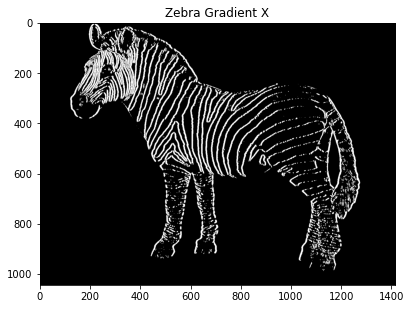

In [30]:
### Zebra: gray scale and blur it
plt.rcParams["figure.figsize"] = [14, 8]
plt.subplot(1, 2, 1)
plt.title("Zebra Gradient X")
plt.imshow(zebra_gradient_x_img, cmap='gray')
plt.show()

# TODO: Work on the zebra_gradient_y_img and uncomment here
# zebra_gradient_y_img = image_gradient_in_y(zebra_gray_blur_img)
# plt.subplot(1, 2, 2)
# plt.title("Zebra Gradient Y")
# plt.imshow(zebra_gradient_y_img, cmap='gray')
plt.show()

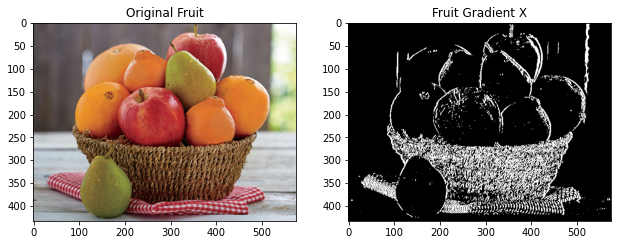

In [31]:
### Fruit Basket: Gradient in the y-direction
plt.rcParams["figure.figsize"] = [16, 8]
plt.subplot(1, 3, 1)
plt.title("Original Fruit")
plt.imshow(fruit_img)

### Fruit: gray scale and blur it
fruit_gray_img = cv2.cvtColor(fruit_img, cv2.COLOR_BGR2GRAY)
fruit_gray_blur_img = cv2.GaussianBlur(fruit_gray_img, (3,3), 0)
fruit_gradient_img = image_gradient(fruit_gray_blur_img)

plt.subplot(1, 3, 2)
plt.title("Fruit Gradient X")
plt.imshow(fruit_gradient_img, cmap='gray')

# TODO: Work on the zebra_gradient_y_img and uncomment here

# fruit_gradient_y_img = image_gradient_in_y(fruit_gray_blur_img)
# plt.subplot(1, 3, 3)
# plt.title("Fruit Gradient Y")
# plt.imshow(fruit_gradient_y_img, cmap='gray')
plt.show()

What we did was a very simplified version of finding gradients.  There are many ways to generalize what we just did.  Instead of finding the different in 2 adjacent pixels, you can imagine that we find the average of 2 pixels and compare it with the neighboring averages of pixels.

## Now, let's use OpenCV functions to detect edges

cv2.Canny( ) : The Canny Edge detector was developed by John F. Canny in 1986. Also known to many as the optimal detector.

https://docs.opencv.org/2.4/doc/tutorials/imgproc/imgtrans/canny_detector/canny_detector.html

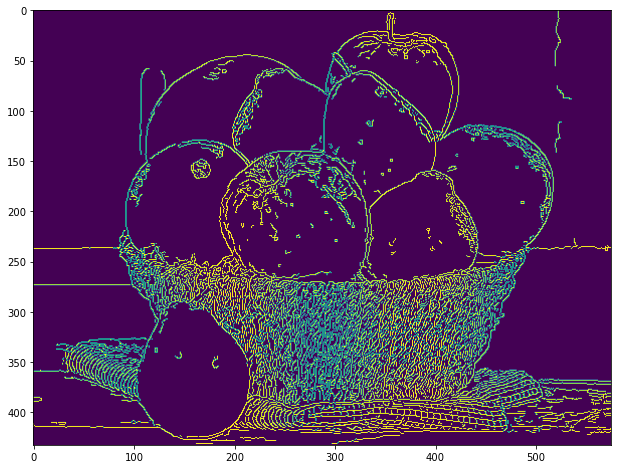

In [32]:
canny_fruit_img = cv2.Canny(fruit_img, 100, 175)

plt.imshow(canny_fruit_img)
plt.show()

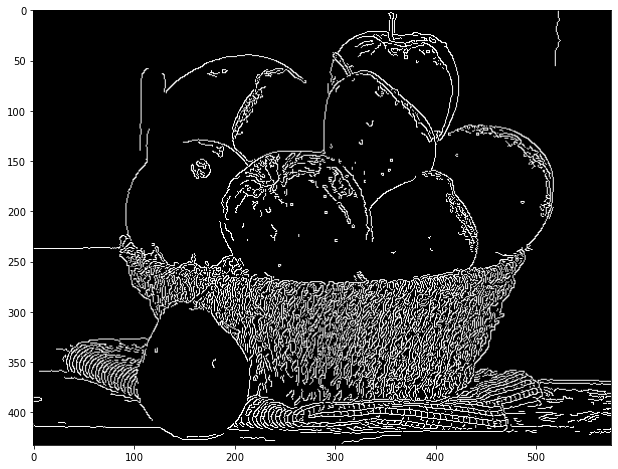

In [33]:
canny_grey_fruit_img = cv2.Canny(gray_fruit_img, 100, 175)

plt.imshow(canny_grey_fruit_img, cmap='gray')
plt.show()

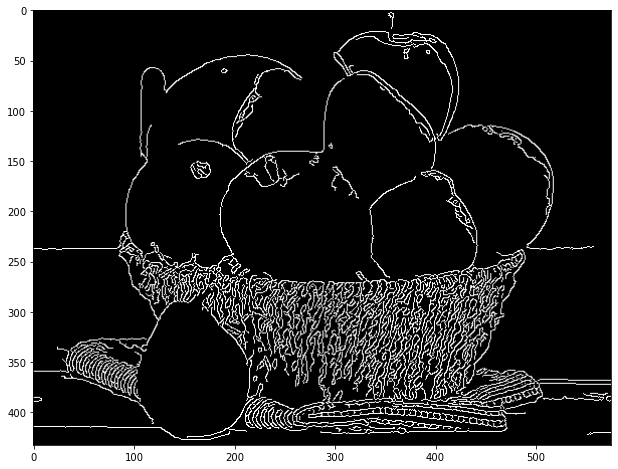

In [34]:
canny_grey_blur_fruit_img = cv2.Canny(gray_blur_fruit_img, 50, 175)

plt.imshow(canny_grey_blur_fruit_img, cmap='gray')
plt.show()

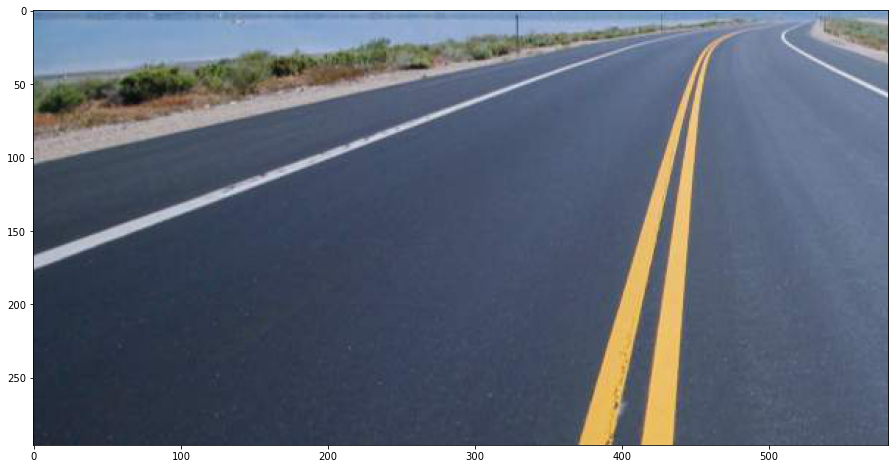

In [35]:
plt.imshow(road_img)
plt.show()

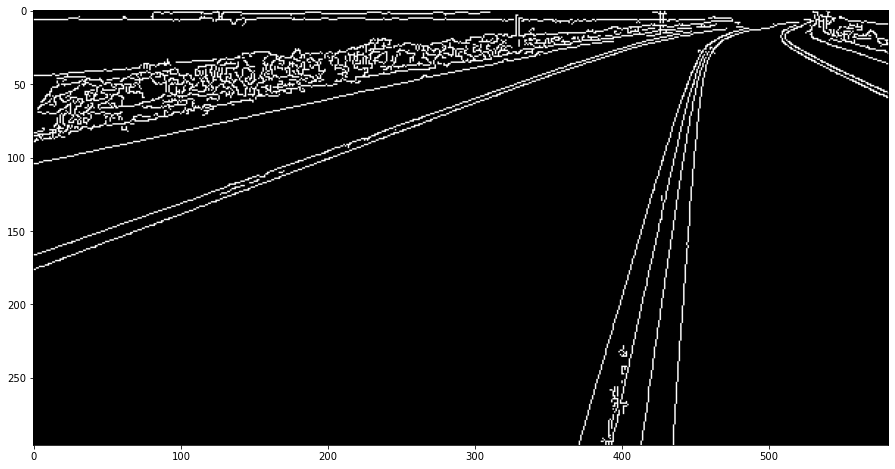

In [36]:
canny_gray_road_img = cv2.Canny(gray_road_img, 50, 175)

plt.imshow(canny_gray_road_img, cmap='gray')
plt.show()

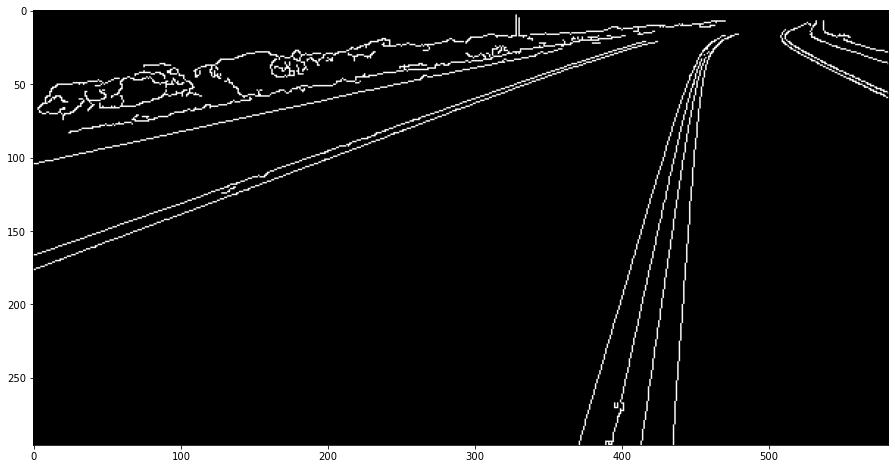

In [37]:
#gray_blur_road_img = cv2.GaussianBlur(gray_road_img, (5,5), 0)
gray_blur_road_img = cv2.bilateralFilter(gray_road_img, 9, 25, 25)

canny_gray_road_img = cv2.Canny(gray_blur_road_img, 50, 175)

plt.imshow(canny_gray_road_img, cmap='gray')
plt.show()

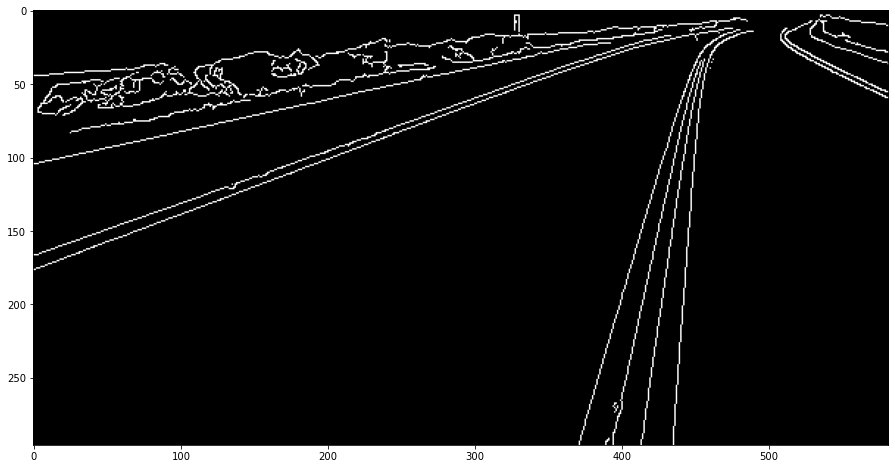

In [38]:
# We can apply this directly to a color image

blur_road_img = cv2.GaussianBlur(road_img, (5,5), 0)
#blur_road_img = cv2.bilateralFilter(road_img, 9, 25, 25)

canny_blur_road_img = cv2.Canny(blur_road_img, 50, 175)

plt.imshow(canny_blur_road_img, cmap='gray')
plt.show()

## 2020 First Robotics Infinite Recharge Playing Field

Let's apply all we've done to the playing field for the 2020 First Robotic's Infinite Recharge Playing Field

In [39]:
from IPython.display import HTML

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/-4VTERLvqC4?controls=1&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')

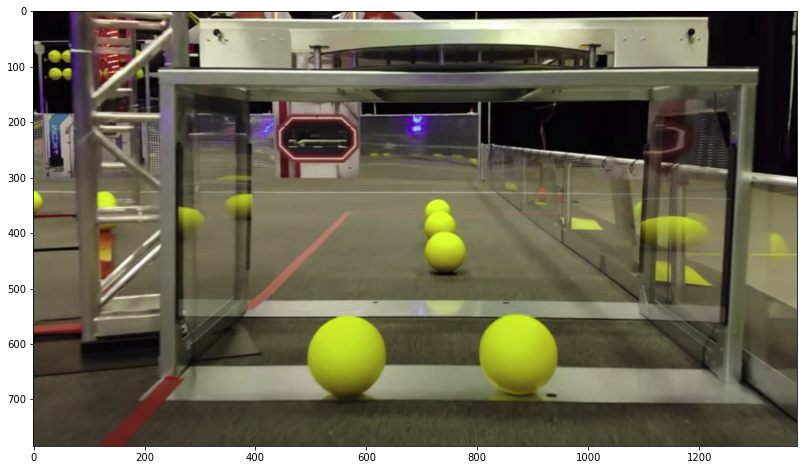

In [40]:
field_img = mpimg.imread('infinite_recharge_playing_field.jpg')
#gray_field_img = cv2.cvtColor(field_img, cv2.COLOR_BGR2GRAY)

# Try different blurring filters
#blur_field_img = cv2.GaussianBlur(field_img, (7,7), 0)
#blur_field_img = cv2.bilateralFilter(field_img, 9, 50, 50)
blur_field_img = cv2.blur(field_img, (9,9))
#blur_field_img = cv2.medianBlur(field_img, 9)

# Try different low and high thresholds for Canny
canny_blur_field_img = cv2.Canny(blur_field_img, 25, 175)

plt.imshow(field_img)
plt.show()

### __Exercise 2: Find the best combination for finding edges in the playing field__

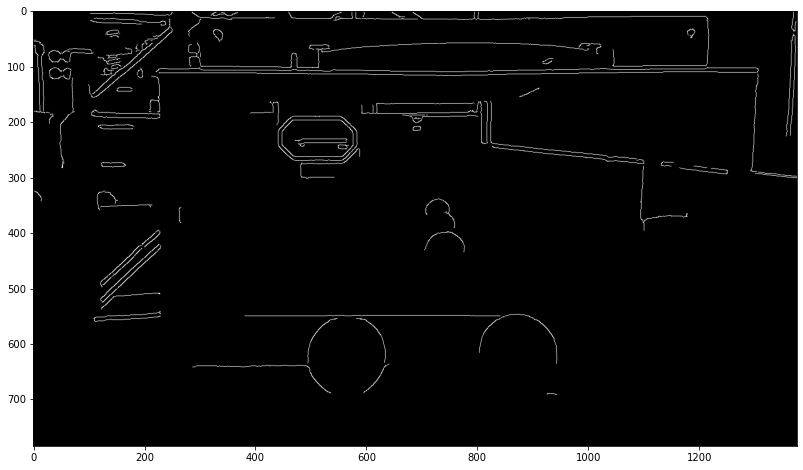

In [41]:
# Try different blurring filters

blur_field_img = cv2.blur(field_img, (7,7))
#blur_field_img = cv2.medianBlur(field_img, 9)
#blur_field_img = cv2.GaussianBlur(field_img, (7,7), 0)
#blur_field_img = cv2.bilateralFilter(field_img, 9, 50, 50)

# Try different low and high thresholds for Canny
canny_blur_field_img = cv2.Canny(blur_field_img, 25, 175)

# Other consideration, is it better to grayscale the picture before blurring and applying Canny filters?

plt.imshow(canny_blur_field_img, cmap='gray')
plt.show()